FINDING THE MRI BRAIN TUMOR DETECTION DATASET

DATASET LINK: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

IMPORT PACKAGES 

In [1]:
import numpy as np
import torch 
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import random
import cv2
import sys

READING THE IMAGES

In [2]:
tumor = []
path = './Data/yes/*.JPG'

for i in glob.iglob(path):
    img = cv2.imread(i)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    tumor.append(img)

In [3]:
len(tumor)

154

In [4]:
healthy = []
path = './Data/no/*.JPG'

for i in glob.iglob(path):
    img = cv2.imread(i)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    healthy.append(img)

In [5]:
len(healthy)

91

In [6]:
for img in tumor:
    print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

COVERTING THE LISTS INTO NUMPY ARRAYS

In [7]:
healthy = np.array(healthy)
tumor = np.array(tumor)

In [8]:
tumor.shape

(154, 128, 128, 3)

In [9]:
healthy.shape

(91, 128, 128, 3)

In [10]:
all = np.concatenate((healthy,tumor))

In [11]:
all.shape

(245, 128, 128, 3)

VISUALIZING BRAIN MRI IMAGES

In [12]:
def plot_random(healthy, tumor, num=5):
    healthy_imgs = healthy[np.random.choice(healthy.shape[0],num, replace=False)]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0],num, replace=False)]

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1,num, i+1)
        plt.title('Healthy')
        plt.imshow(healthy_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1,num, i+1)
        plt.title('Tumor')
        plt.imshow(tumor[i]) 


In [13]:
# Using only one for-loop

# def plot_random(healthy, tumor, num=5):
#     fig, axes = plt.subplots(2, num, figsize=(16, 9))

#     for i in range(num):
#         healthy_img = healthy[np.random.choice(healthy.shape[0])]
#         tumor_img = tumor[np.random.choice(tumor.shape[0])]

#         axes[0, i].imshow(healthy_img)
#         axes[0, i].set_title('Healthy')
#         axes[0, i].axis('on')

#         axes[1, i].imshow(tumor_img)
#         axes[1, i].set_title('Tumor')
#         axes[1, i].axis('on')

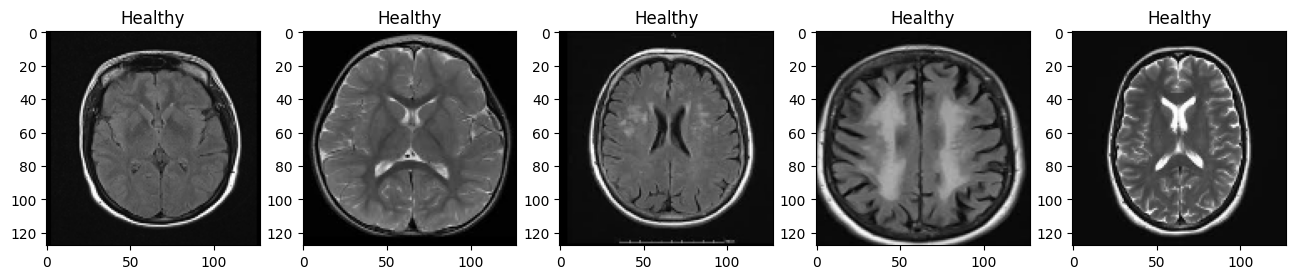

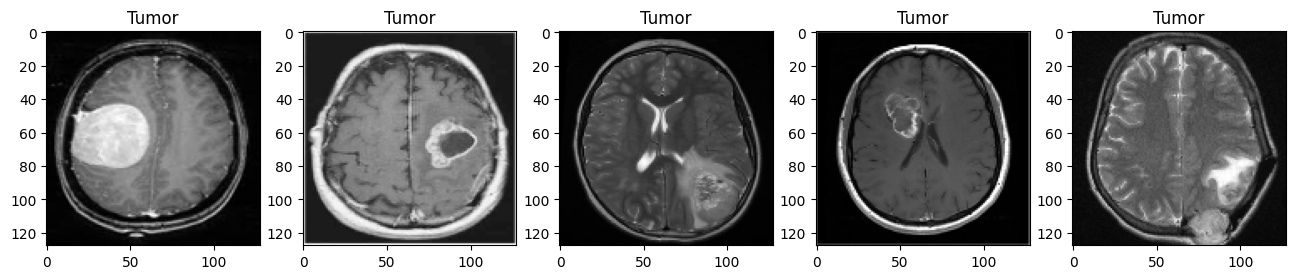

In [14]:
plot_random(healthy, tumor)

Create Torch Dataset Class

In [15]:
class Dataset(object):

    def __getitem__(self, index):
        raise NotImplementedError
    
    def __len__(self):
        raise NotImplementedError
    
    def __add__(self, other):
        return ConcatDataset([self, other])

Creating MRI custom dataset

In [16]:
class MRI(Dataset):
    def __init__(self):
        tumor = []
        healthy = []
        path = './Data/yes/*.JPG'
        for i in glob.iglob(path):
            img = cv2.imread(i)
            img = cv2.resize(img,(128,128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape((img.shape[2], img.shape[0], img.shape[1]))
            tumor.append(img)

        path = './Data/no/*.JPG'
        for i in glob.iglob(path):
            img = cv2.imread(i)
            img = cv2.resize(img,(128,128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape((img.shape[2], img.shape[0], img.shape[1]))
            healthy.append(img)

        # images
        tumor = np.array(tumor,dtype=np.float32)
        healthy = np.array(healthy,dtype=np.float32)

        # Labels
        tumor_labels = np.ones(tumor.shape[0], dtype=np.float32)
        healthy_labels = np.zeros(healthy.shape[0], dtype=np.float32)

        # Concatenates

        self.images = np.concatenate((tumor,healthy), axis =0)
        self.labels = np.concatenate((tumor_labels,healthy_labels))

    def __len__(self):
        return self.images.shape[0]
    
    def __getitem__(self, index):
        sample = {'image':self.images[index], "Label":self.labels[index]}
        return sample
    
    def normalize(self):
        self.images = self.images/255.0 



In [17]:
mri = MRI()
mri.normalize()

Creating a Dataloader

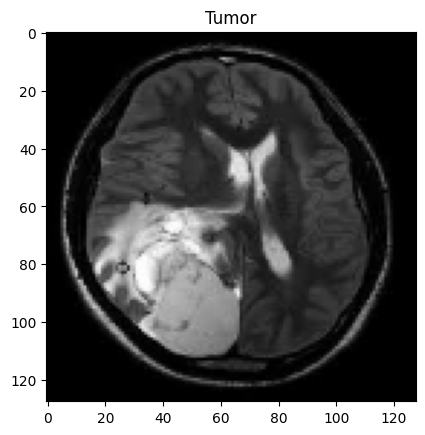

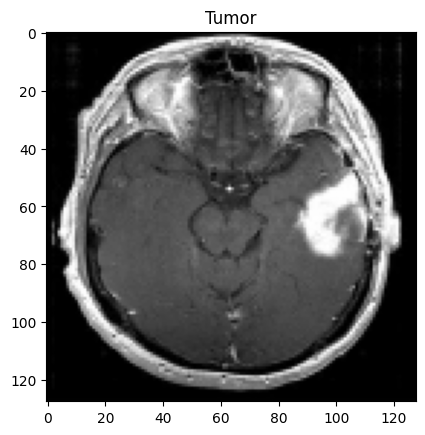

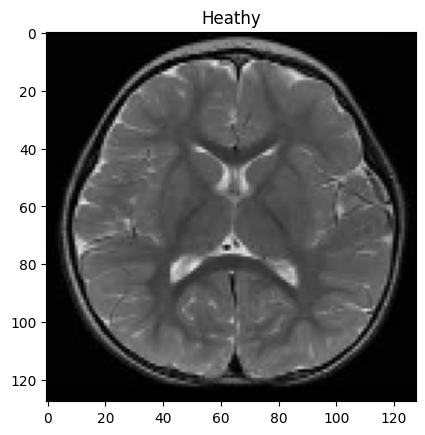

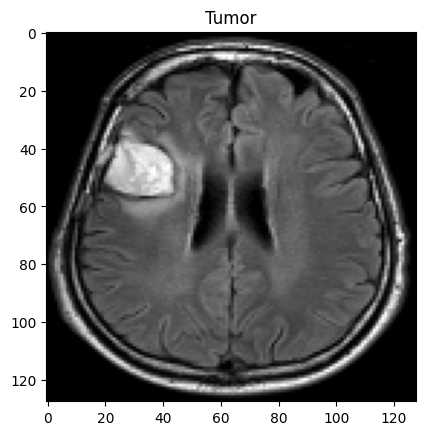

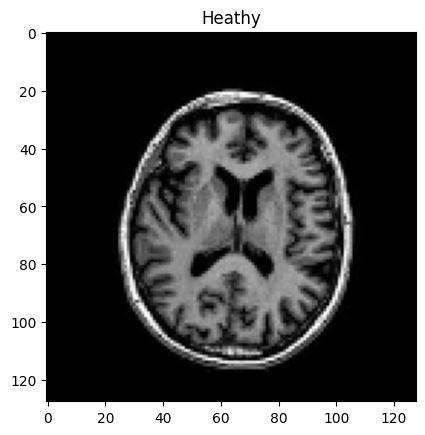

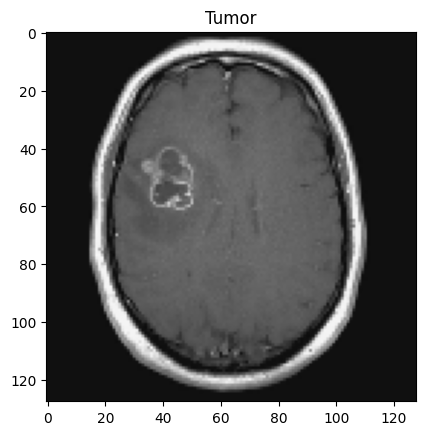

In [18]:
names={0:'Heathy', 1:'Tumor'}
dataloader = DataLoader(mri, shuffle=True)
for i, sample in enumerate(dataloader):
    img = sample['image'].squeeze()
    img = img.reshape((img.shape[1], img.shape[2], img.shape[0]))
    plt.title(names[sample['Label'].item()])
    plt.imshow(img)
    plt.show()
    if i == 5:
        break

Create a Model

In [19]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.cnn_model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5),
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5))

        self.fc_model = nn.Sequential(
        nn.Linear(in_features=256, out_features=120),
        nn.Tanh(),
        nn.Linear(in_features=120, out_features=84),
        nn.Tanh(),
        nn.Linear(in_features=84, out_features=1))
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        x = F.sigmoid(x)

        return x 

In [20]:
model = CNN()
model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)